## Info On Heart Disease from UCI Cleveland and Kaggle

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779


Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.




## Data Dictionary
 Attribute Information:
   -- Only 14 used
       1. #3  (age)       
       2. #4  (sex)       
       3. #9  (cp)        
       4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)    (the predicted attribute)

   -- Complete attribute documentation:
* id: patient identification number
* ccf: social security number (I replaced this with a dummy value of 0)
* age: age in years
* sex: sex (1 = male; 0 = female)
* painloc: chest pain location (1 = substernal; 0 = otherwise)
* painexer (1 = provoked by exertion; 0 = otherwise)
* relrest (1 = relieved after rest; 0 = otherwise)
* pncaden (sum of 5, 6, and 7)
* cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
* htn
* chol: serum cholestoral in mg/dl
*  smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
*  cigs (cigarettes per day)
* years (number of years as a smoker)
* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
*  dm (1 = history of diabetes; 0 = no such history)
* famhist: family history of coronary artery disease (1 = yes; 0 = no)



**When accuracy of model is 95% we can consider it using it**

## Importing all libraries for creating the machine learning Algorithm


* We are going to use numpy , matplotlib , pandas and seaborn for data manipulation and visualization

In [1]:
#Importing all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#Importing the Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Importing sklearn metrics (Classification)
from sklearn.metrics import precision_score , recall_score , accuracy_score , f1_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("heart-disease.csv")

### Performing EDA(Exploratory Data Analysis)
1. What questions are trying to solve and how ??
2. What types of data are involved and how different?? 
3. Are there missing values in the dataset and how do we intead to treat it ??
4. Are outliers in the data and should we care ??
5. How can we modify the data to get a lot of our data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.shape

(303, 14)

In [8]:
#Missing Data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [10]:
# pd.crosstab('age' , 'target')

In [11]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

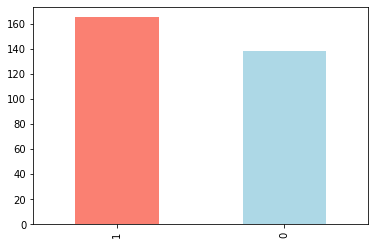

In [12]:
df.target.value_counts().plot(kind='bar' , color = ['salmon' , 'lightblue']);

In [13]:
#describing the data 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Comparing most Features Or (X) With the target Column

In [14]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

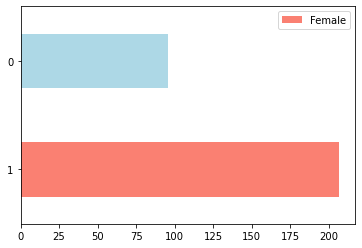

In [15]:
df.sex.value_counts().plot(kind='barh' , color = ['salmon' , 'lightblue']);
plt.legend(["Female","Male"]);

In [16]:
## Compaing sex with target
pd.crosstab(df['sex'] , df['target'])

target,0,1
sex,,
0,24,72
1,114,93


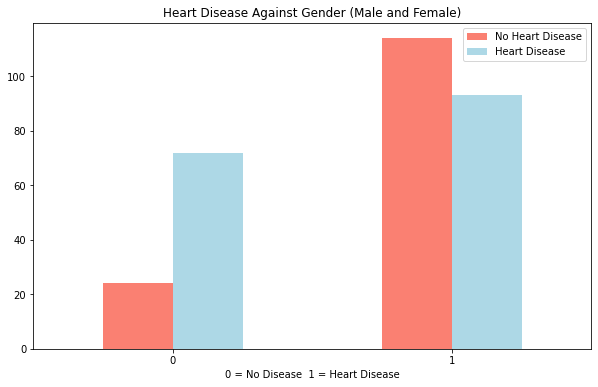

In [17]:
# Female = 0
#Male = 1

pd.crosstab(df.sex , df.target).plot(kind="bar" , color=['salmon' , 'lightblue'] , figsize=(10,6))
plt.xlabel('0 = No Disease' + '  ' '1 = Heart Disease')
plt.legend(["No Heart Disease" , "Heart Disease"])
plt.xticks(rotation = 0);
plt.title("Heart Disease Against Gender (Male and Female)");

In [18]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


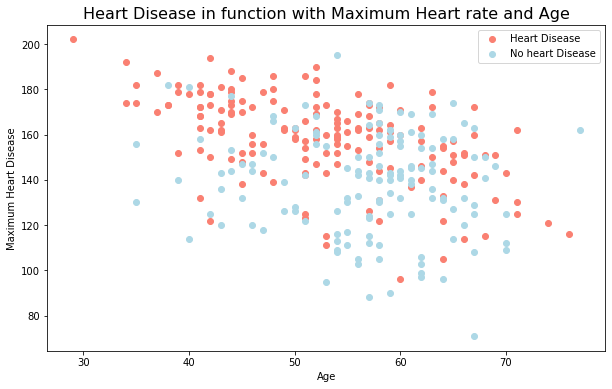

In [19]:
#Plotting a figure 
plt.figure(figsize=(10,6))

#Plotting a scatter of heart disease against Maximum Heart Rate
plt.scatter(df.age[df.target==1]  , df.thalach[df.target==1]   , color = ['salmon'])

#Plotting a negative scatter of heart disease against Maximum Heart Rate
plt.scatter(df.age[df.target==0] , df.thalach[df.target==0] , c = 'lightblue')
plt.xlabel("Age")
plt.ylabel('Maximum Heart Disease')
plt.legend(['Heart Disease' , 'No heart Disease'])
plt.title("Heart Disease in function with Maximum Heart rate and Age" , fontsize=16);

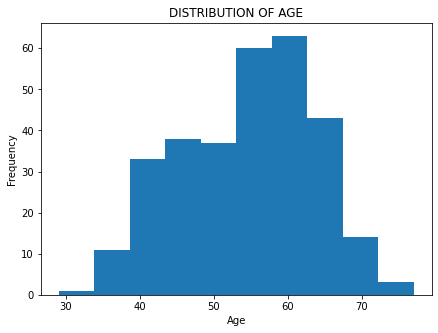

In [20]:
# CHecking the distribution

#Figsize
plt.figure(figsize=(7,5))
df.age.plot(kind='hist');
plt.xlabel("Age")
plt.title("DISTRIBUTION OF AGE");

In [21]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [22]:
# cp: chest pain type
#   -- Value 1: typical angina
#   -- Value 2: atypical angina
#   -- Value 3: non-anginal pain
#   -- Value 4: asymptomatic

#Comparing The various types of chest pain against Target 
pd.crosstab(df.cp , df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


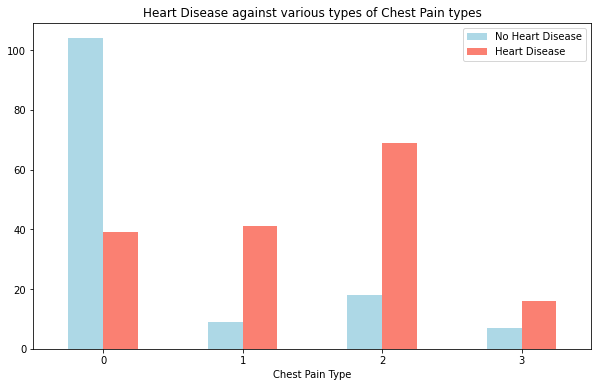

In [23]:
# cp: chest pain type
#   -- Value 1: typical angina
#   -- Value 2: atypical angina
#   -- Value 3: non-anginal pain
#   -- Value 4: asymptomatic

#plotting various types of chest pain against Target 
pd.crosstab(df.cp , df.target).plot(kind='bar' , color = ['lightblue' , 'salmon'] , figsize=(10,6))
plt.xticks(rotation = 0)
plt.xlabel("Chest Pain Type")
plt.legend(['No Heart Disease' , 'Heart Disease'])
plt.title("Heart Disease against various types of Chest Pain types");


In [24]:
#Plotting a Confusion Matrix 
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


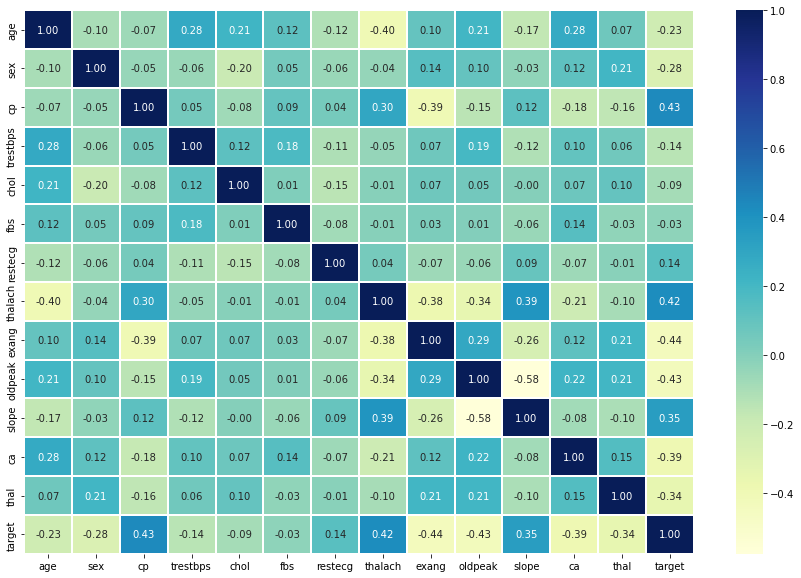

In [25]:
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr , annot=True ,fmt='.2f',linewidths= 1.7  , cmap = 'YlGnBu')

## Model Training

In [26]:
#Splitting data into X and y
X = df.drop(['target'] , axis =1)
y = df['target']

In [27]:
# Spitting data into Training and Testing data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
X_test 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3


### Selecting the Right Estimator Or Machine Learning algorithm for the Data
**We have to train the model using a machine learning algorithm and evaluate it using the different types of metrics** 

#### Classification Problem
* Logisitic Regression 
* RandomForestClassifier
* K_Nearest neighbours

In [31]:
#Creating a model Dictionary 
model = {"Logistic Regression": LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

score_model = {}


In [32]:
## Creating a fuction to Fit and Score the Model 
def fit_and_score_model(model , X_train, y_train, X_test  , y_test):
    """
    Training the machine Learning Model and Fitting it 
    X_train : Training labels (No labels )
    y_train : training labels 
    X_test : Testing labels (No labels) 
    y_test : Real labels 
    """
    
    #Setting random Seed 
    np.random.seed(42)
    #looping through the models 
    for name , model in model.items():
        #Fitting the model using the model from loop and fitting 
        print("Fitting the label 👍........")
        model.fit(X_train , y_train)
        
        #Scoring the model 
        print("Scoring the model ✔️ >>>>>>> .......")
        model.score(X_test , y_test)
        
        #Appending the scores to the empty dictionary
        score_model[name] = model.score(X_test , y_test)
    return score_model

In [33]:
model_scores = fit_and_score_model(model=model , X_train=X_train ,y_train = y_train , X_test = X_test , y_test = y_test)
model_scores

Fitting the label 👍........
Scoring the model ✔️ >>>>>>> .......
Fitting the label 👍........
Scoring the model ✔️ >>>>>>> .......
Fitting the label 👍........
Scoring the model ✔️ >>>>>>> .......


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

## Model Comparison 

In [34]:
models_plot = pd.DataFrame( model_scores,index=['Accuracy'])
models_plot

,Logistic Regression,KNN,Random Forest
Accuracy,0.885246,0.639344,0.885246


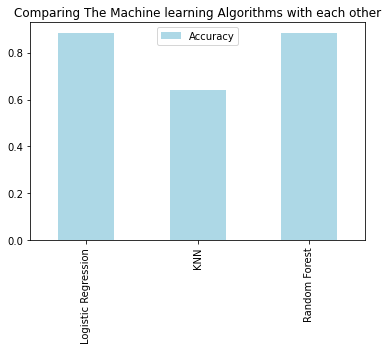

In [35]:
models_plot.T.plot(kind='bar' , color = 'lightblue');
plt.title("Comparing The Machine learning Algorithms with each other");


In [36]:
## Tuning Hyperparameters
Test_score = []
Training_scores = []

#Setting up the range to tune the n_neighbors
neighbors = np.arange(1,25)

#Setting Up Knn Instance 
KNN = KNeighborsClassifier()

#A loop
for i in neighbors:
    KNN.set_params(n_neighbors =i)
    
    #Fitting and scoring the model 
    KNN.fit(X_train , y_train)

#Appending the training scores and test scores in as list 
    Test_score.append(KNN.score(X_test , y_test))
    Training_scores.append(KNN.score(X_train , y_train))




In [37]:
Training_scores

[1.0,
 0.8099173553719008,
 0.78099173553719,
 0.7603305785123967,
 0.7603305785123967,
 0.756198347107438,
 0.7396694214876033,
 0.7272727272727273,
 0.7272727272727273,
 0.7066115702479339,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.6818181818181818,
 0.6942148760330579,
 0.6776859504132231,
 0.6942148760330579,
 0.6942148760330579,
 0.6942148760330579,
 0.6900826446280992,
 0.7024793388429752,
 0.6983471074380165,
 0.7107438016528925,
 0.6942148760330579]

In [38]:
Test_score

[0.5409836065573771,
 0.47540983606557374,
 0.639344262295082,
 0.5901639344262295,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836]

The Max Model Score is 70.49%


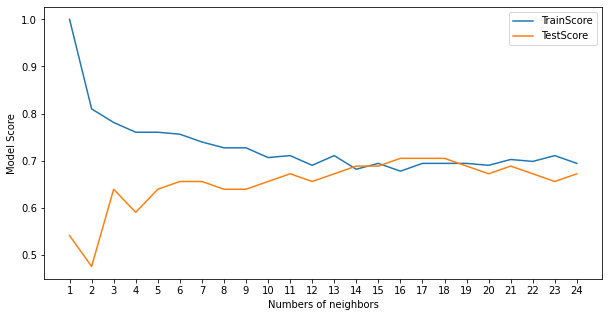

In [39]:
#PLotting the scores using a line graph 
plt.figure(figsize=(10,5))
plt.plot(neighbors , Training_scores , label = 'TrainScore')
plt.plot(neighbors , Test_score , label='TestScore')
plt.xlabel("Numbers of neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1,25,1));
print(f"The Max Model Score is {max(Test_score)*100:.2f}%");

In [40]:
## Hyperparameter Tuning For logistic Regression and RandomForest
LogisticRegression()
log_reg_grid = {"solver":["liblinear"],
                'C' : np.logspace(-4,4,20)
               }

## Creating a hyperparameter for RandomForestClassifier
rfc_grid = {'n_estimators': np.arange(10,1000,50),
            "max_depth": [None , 3 ,5 , 10],
            "min_samples_split" : np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)}


### Hyperparameter Tuning for logistic Regression and RandomForestClassifier



In [41]:
#Tune Logistic regression 
np.random.seed(42)
log_ref_rs = RandomizedSearchCV(LogisticRegression() , 
                                param_distributions=log_reg_grid ,
                                cv=5 ,
                                 verbose=2,n_iter=20)
#Fitting the Hyperparamter Using RSCV =RandomizedSearchCV
log_ref_rs.fit(X_train , y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [42]:
### Checking the SCore of the Newly trained model 
log_ref_rs.score(X_test , y_test)

0.8852459016393442

In [43]:
### Lets DO the same for RandomForestClassifier
#randomforestclassifier Hyperparameter Tuning
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier() ,
                           param_distributions=rfc_grid , 
                           verbose=True ,
                           n_iter=20)

# Fitting the RandomSearchCV with our RandomForestClassifier()
rs_rf.fit(X_train , y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
rs_rf.best_estimator_

RandomForestClassifier(min_samples_leaf=5, min_samples_split=12,
                       n_estimators=310)

In [45]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [46]:
#Scoring the Accuracy of the model 
rs_rf.score(X_test  , y_test)

0.9016393442622951

#### There's have been an improvement in our Machine learning Model (random Forest Classifier()) which moved from 0.78 to 0.819

## Now tuning our Logistc Regression Model using GridSearchCV 

In [47]:
log_reg_grid = {"solver" : ['liblinear'],
               'C' : np.logspace(-4,4,30)}

#Setting the GridSearchCV with our estimator ()
log_reg_gs = GridSearchCV(LogisticRegression() , param_grid=log_reg_grid  , cv = 5 , verbose = 2 )

#Fitting The Estimator 
log_reg_gs.fit(X_train , y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [48]:
# Checking the Best Parameters 
log_reg_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
#Evaluating the Newly Hyperparamter Tuned Model
log_reg_gs.score(X_test , y_test)

0.8852459016393442

In [50]:
score_model

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

## Evaluating our tuned machine learning classifier,beyond accuracy
* ROC Curve and AUC score
* Confusion Matrix
* Classification Report
* Precision 
* Recall
* F1 -score


In [51]:
#Make Predictions 
y_pred = log_reg_gs.predict(X_test)

In [52]:
#Y_preds
y_pred[:20]

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [53]:
y_test[:20]

266    0
252    0
75     1
45     1
50     1
72     1
291    0
105    1
172    0
56     1
70     1
208    0
166    0
282    0
157    1
186    0
293    0
179    0
0      1
154    1
Name: target, dtype: int64

## Creating Visualizations and Report on the Performance of the data 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


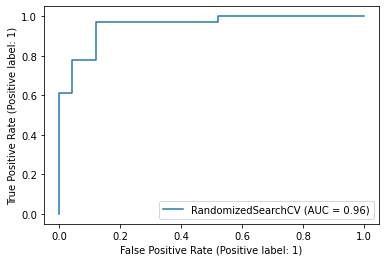

In [54]:
# ROC CURVE using the plot_roc_curve function in Scikit Learn Metrics
# Receiver Operating Curve 
plot_roc_curve(rs_rf , X_test , y_test);

In [55]:
## Confusion Matrix 
conf_matrix = confusion_matrix(y_test , y_pred)

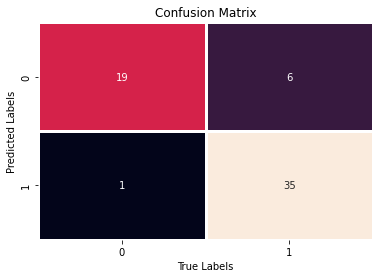

In [56]:
## Visualization of the Confusion Matrix Using Seaborn
def plot_confusion_mat(y_test , y_pred):
    """
    PLots a Seaborn Using to visualize a Confusion Matrix
    """
    fig , ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test , y_pred) , cbar=False  , fmt='.2g' , annot=True , 
                    linewidths=1.2)
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")
    plt.title("Confusion Matrix")

plot_confusion_mat(y_test , y_pred)

## Classification Report On How the Machine Learning Estimator Performed

In [57]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.85      0.97      0.91        36

    accuracy                           0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



## From above 
* Precision is how many predictions the Model correctly predicted
* Recall is the 
* F-1 score is 
* Support is showing how many of classes of data we have


In [58]:
## Using Cross Validation on Precision ,Accuracy,  f1 score and Recall 
log_reg_gs.best_score_

0.8385204081632655

In [59]:
# Finding the best params 
log_reg_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
clf = LogisticRegression(C= 0.05736152510448681 , solver='liblinear')

## Creating a function to cross validate Classifications 


In [ ]:
# Precision  Cross Validated Score 
cv_precision = cross_val_score(clf , X , y , cv=5 , scoring='precision')
print(cv_precision)
print('')
print(f"The Cross Validated Score for the Model on precision is {np.mean(cv_precision)*100:.2f}%")

In [ ]:
#Accuracy Cross Validated Score
cv_accuracy = cross_val_score(clf , X , y , cv=5 , scoring='accuracy')
print(cv_accuracy)
print('')
print(f"The Cross Validated Score for the Model on accuracy is {np.mean(cv_accuracy)*100:.2f}%")

In [ ]:
#F1 Score 
cv_f1 = cross_val_score(clf , X , y , cv=5 , scoring='f1')
print(cv_f1)
print('')
print(f"The Cross Validated Score for the Model on f1 is {np.mean(cv_f1)*100:.2f}%")

In [ ]:
cv_recall = cross_val_score(clf , X , y , cv=5 , scoring='recall')
print(cv_recall)
print('')
print(f"The Cross Validated Score for the Model on recall  is {np.mean(cv_recall)*100:.2f}%")

# Feature Importance 

Feature importance is same as asking  ,"Which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different from each machine learning model .One way to find feature importance is to search for (MODEL NAME)feature importance."

Lets find the feature importance for Our Logistic regression .....

In [63]:
log_reg_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [64]:
clf  = LogisticRegression(C = 0.20433597178569418 , solver='liblinear')

clf.fit(X_train , y_train);

In [66]:
#Checking the coefficients which conribute the most to the machine learning algorithm 

clf.coef_

array([[ 0.00747656, -0.7780963 ,  0.63437566, -0.01364597, -0.00299432,
         0.05324956,  0.36919195,  0.02531603, -0.48712766, -0.45922342,
         0.39999223, -0.59779971, -0.58872917]])

In [67]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [74]:
feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.007476558005630367,
 'sex': -0.7780962985123262,
 'cp': 0.6343756639168,
 'trestbps': -0.013645971353706073,
 'chol': -0.00299431990012352,
 'fbs': 0.053249563656659726,
 'restecg': 0.3691919473967284,
 'thalach': 0.025316033562906556,
 'exang': -0.48712765916201145,
 'oldpeak': -0.4592234162625628,
 'slope': 0.3999922349961823,
 'ca': -0.597799710213032,
 'thal': -0.588729167326763}

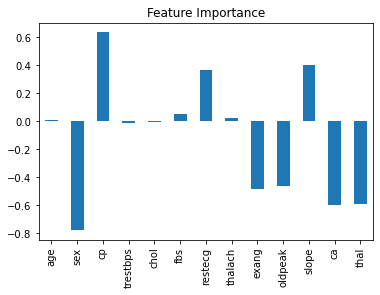

In [82]:
## Visualize Feature Importance
feature_visual = pd.DataFrame(feature_dict , index=[0])
feature_visual.T.plot.bar(title = "Feature Importance" , legend =False);

In [78]:
pd.crosstab(df['sex'] , df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [79]:
pd.crosstab(df['slope'] , df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Slope  - the slope of the peak exercise ST segment
* 0 : Upsloping: better heart rate with exercise (uncommon)
* 1 : Flatsloping : minimal change (typical healthy heart)
* 2 : Downslopings : Signs of unhealthy Heart 